In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/simulated/export_20260112_205254.csv')

In [3]:
df.head()

,temperature,vibration,current,rpm,motor_health,health_state,hours_since_maintenance,degradation_stage,time,motor_id,regime,maintenance_event
0,28.053492,2.041728,9.281507,1796.628873,0.961137,Healthy,1108.583333,0,28853,0,normal,NaN
1,28.843375,3.297628,15.004968,1802.651850,0.513702,Warning,2404.500000,1,28853,1,normal,NaN
2,28.098065,2.092782,11.402582,1793.540726,0.952816,Healthy,284.916667,0,28853,2,normal,NaN
3,28.833819,2.738380,16.121263,1792.813387,0.665579,Warning,1381.416667,1,28853,3,normal,NaN
4,28.828786,2.486500,16.759667,1795.299183,0.707535,Healthy,2404.500000,1,28853,4,normal,NaN


In [4]:
df.groupby("motor_id")["time"].agg(['min', 'max', 'count'])

,min,max,count
motor_id,,,
0,28853,30852,2000
1,28853,30852,2000
2,28853,30852,2000
3,28853,30852,2000
4,28853,30852,2000


In [8]:
df.groupby("motor_id")["health_state"].value_counts()

motor_id  health_state
0         Healthy         2000
1         Healthy         1532
          Warning          320
          Critical         148
2         Healthy         2000
3         Healthy         1318
          Warning          677
          Critical           5
4         Warning         1863
          Healthy          136
          Critical           1
Name: count, dtype: int64

In [9]:
df.isnull().sum()

temperature                  40
vibration                    69
current                      48
rpm                          61
motor_health                  0
health_state                  0
hours_since_maintenance       0
degradation_stage             0
time                          0
motor_id                      0
regime                        0
maintenance_event          9957
dtype: int64

In [10]:
df.groupby('motor_id')['maintenance_event'].value_counts()

motor_id  maintenance_event    
0         lubrication               3
1         component_replacement    22
          lubrication               3
          automatic_maintenance     1
2         lubrication               3
3         lubrication               5
          automatic_maintenance     1
          component_replacement     1
4         lubrication               4
Name: count, dtype: int64

In [11]:
df.isna().mean()


temperature                0.0040
vibration                  0.0069
current                    0.0048
rpm                        0.0061
motor_health               0.0000
health_state               0.0000
hours_since_maintenance    0.0000
degradation_stage          0.0000
time                       0.0000
motor_id                   0.0000
regime                     0.0000
maintenance_event          0.9957
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature              9960 non-null   float64
 1   vibration                9931 non-null   float64
 2   current                  9952 non-null   float64
 3   rpm                      9939 non-null   float64
 4   motor_health             10000 non-null  float64
 5   health_state             10000 non-null  object 
 6   hours_since_maintenance  10000 non-null  float64
 7   degradation_stage        10000 non-null  int64  
 8   time                     10000 non-null  int64  
 9   motor_id                 10000 non-null  int64  
 10  regime                   10000 non-null  object 
 11  maintenance_event        43 non-null     object 
dtypes: float64(6), int64(3), object(3)
memory usage: 937.6+ KB


C:\Users\Ayush\AppData\Local\Temp\ipykernel_9356\631801904.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Motor ID')


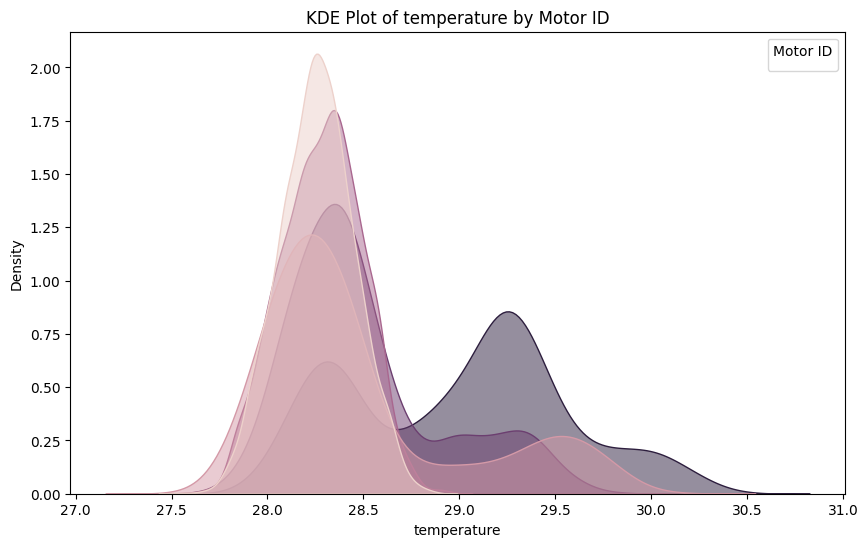

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9356\631801904.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Motor ID')


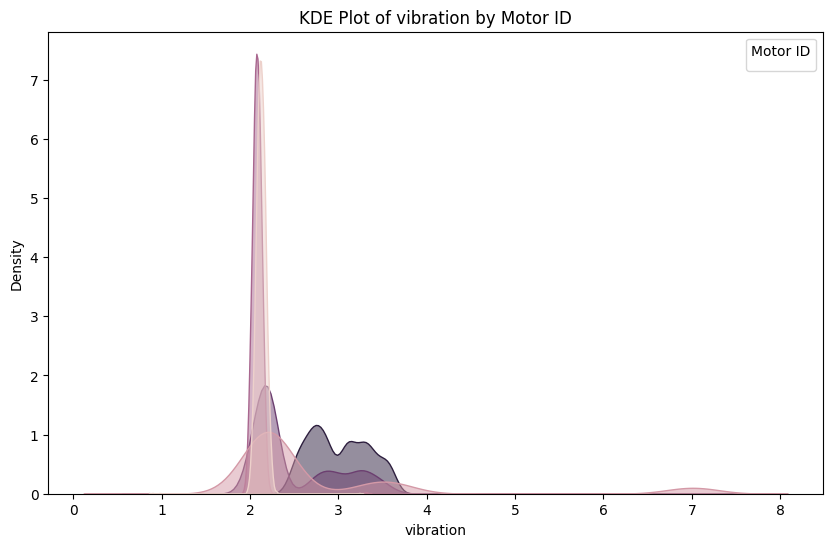

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9356\631801904.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Motor ID')


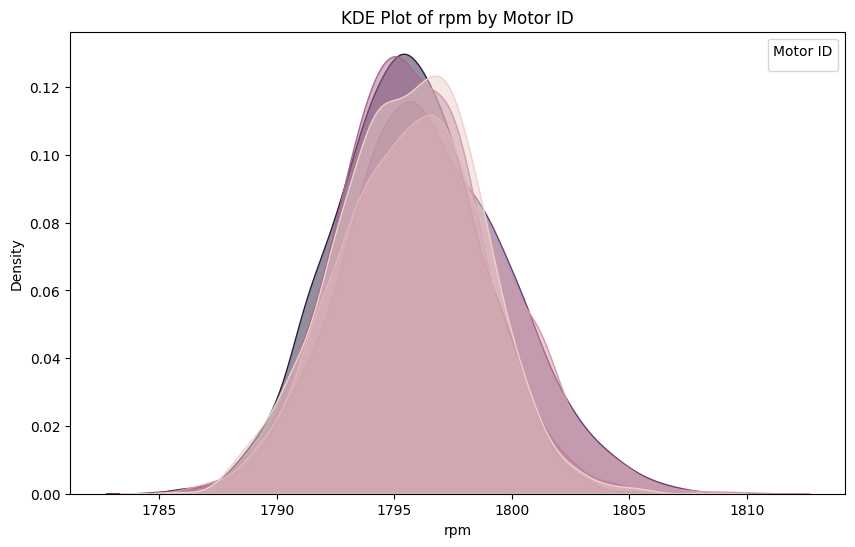

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9356\631801904.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Motor ID')


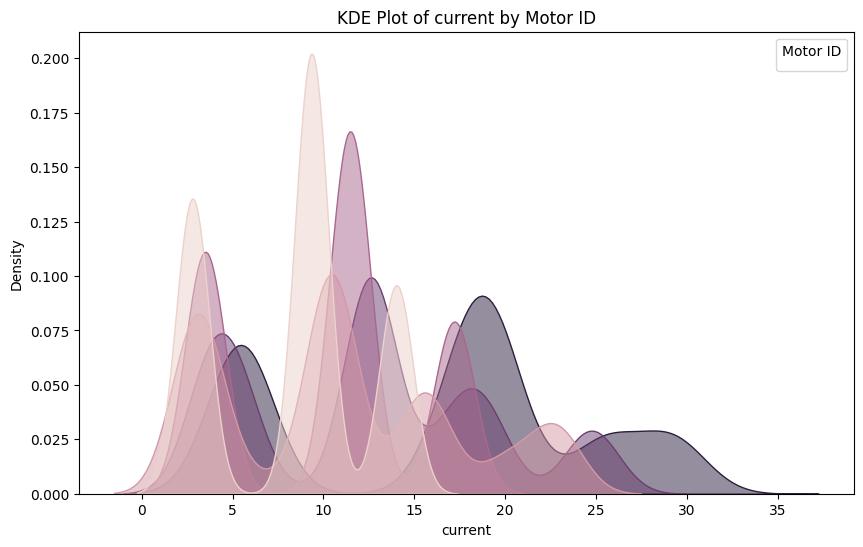

C:\Users\Ayush\AppData\Local\Temp\ipykernel_9356\631801904.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Motor ID')


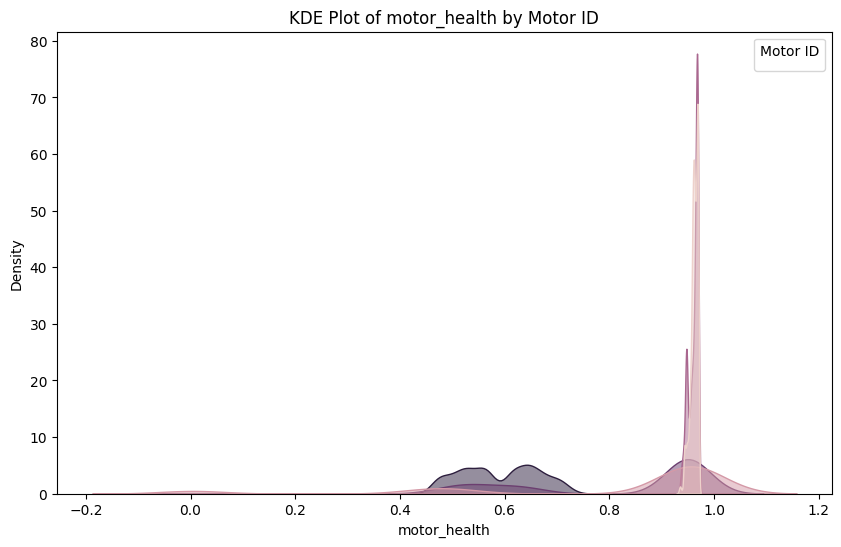

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_kde =['temperature', 'vibration', 'rpm', 'current','motor_health']

for feature in feature_kde:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='motor_id', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'KDE Plot of {feature} by Motor ID')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Motor ID')
    plt.show()

<Axes: xlabel='motor_id', ylabel='vibration'>

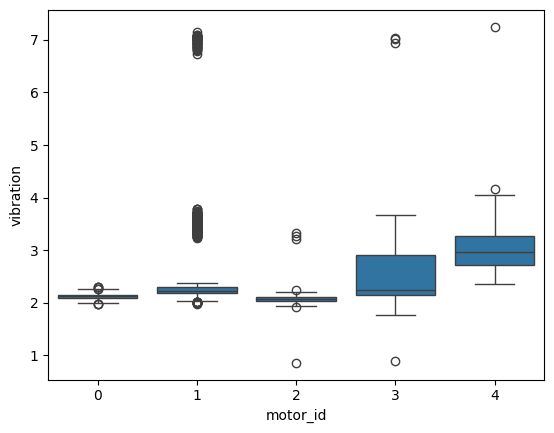

In [16]:
sns.boxplot(x="motor_id", y="vibration", data=df.sample(5000))


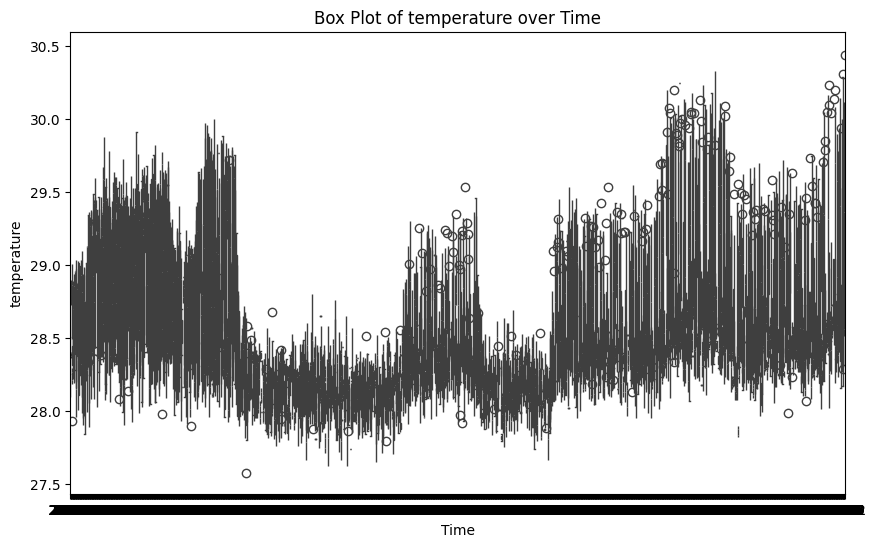

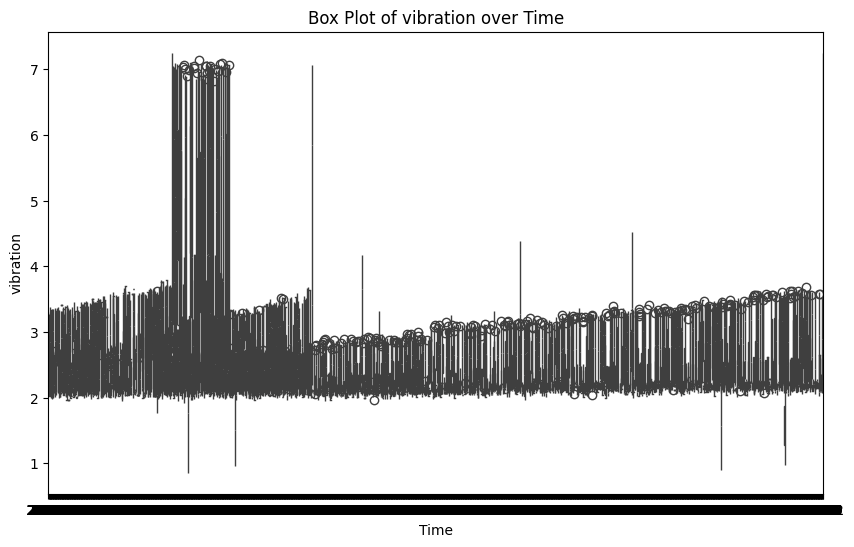

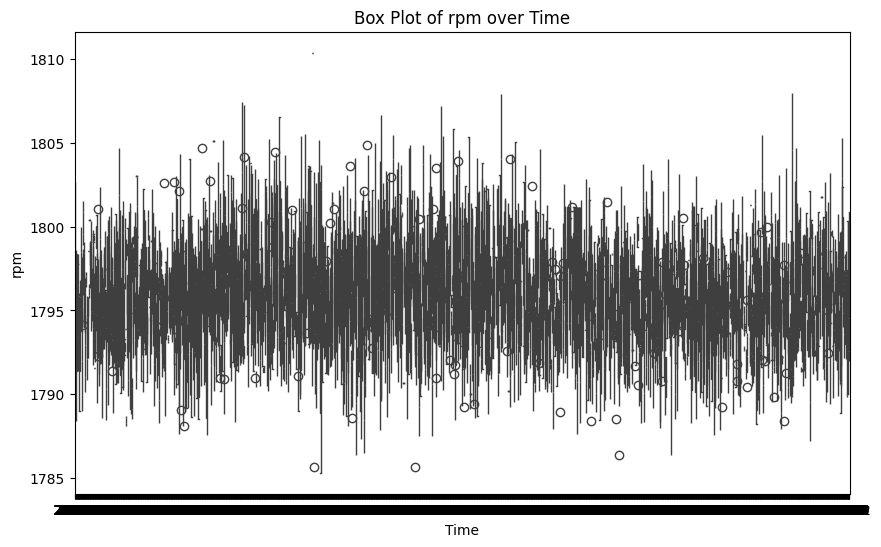

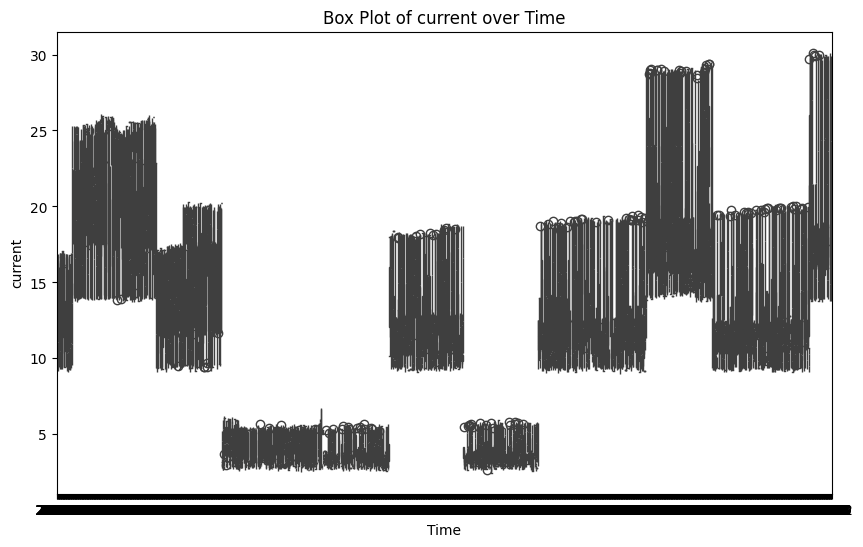

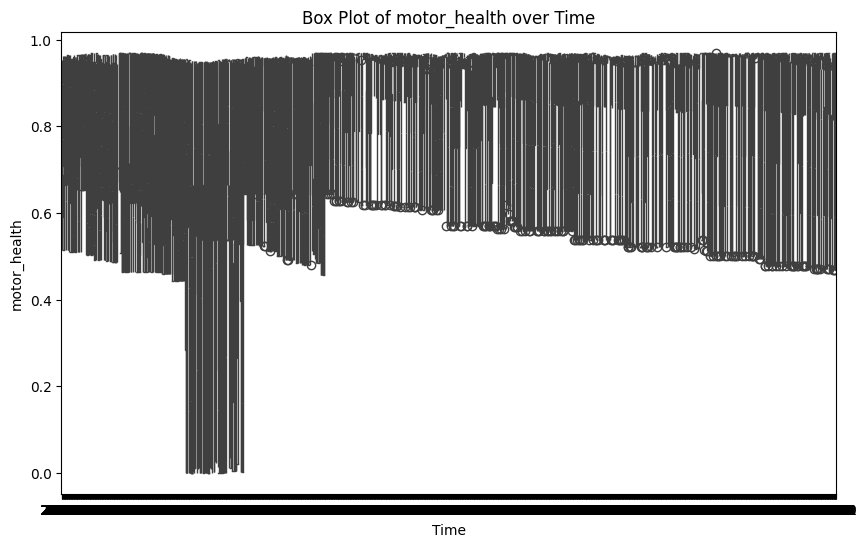

In [17]:
for feature in feature_kde:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['time'], y=feature, data=df.sample(5000))
    plt.title(f'Box Plot of {feature} over Time')
    plt.xlabel('Time')
    plt.ylabel(feature)
    plt.show()

In [23]:
motor_healt_vs_temp_corr = df["motor_health"].shift(20).corr(df["temperature"])
print(f'motor_health vs temperature correlation (shifted by 20): {motor_healt_vs_temp_corr}')

motor_health vs temperature correlation (shifted by 20): -0.7106215376194398


In [24]:
motor_healt_vs_vibration_corr = df["motor_health"].shift(20).corr(df["vibration"])
print(f'motor_health vs vibration correlation (shifted by 20): {motor_healt_vs_vibration_corr}')

motor_health vs vibration correlation (shifted by 20): -0.9055339705792703


In [25]:
motor_healt_vs_current_corr = df["motor_health"].shift(20).corr(df["current"])
print(f'motor_health vs current correlation (shifted by 20): {motor_healt_vs_current_corr}')

motor_health vs current correlation (shifted by 20): -0.44785421340966575


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature              9960 non-null   float64
 1   vibration                9931 non-null   float64
 2   current                  9952 non-null   float64
 3   rpm                      9939 non-null   float64
 4   motor_health             10000 non-null  float64
 5   health_state             10000 non-null  object 
 6   hours_since_maintenance  10000 non-null  float64
 7   degradation_stage        10000 non-null  int64  
 8   time                     10000 non-null  int64  
 9   motor_id                 10000 non-null  int64  
 10  regime                   10000 non-null  object 
 11  maintenance_event        43 non-null     object 
dtypes: float64(6), int64(3), object(3)
memory usage: 937.6+ KB


<Axes: xlabel='time', ylabel='motor_health'>

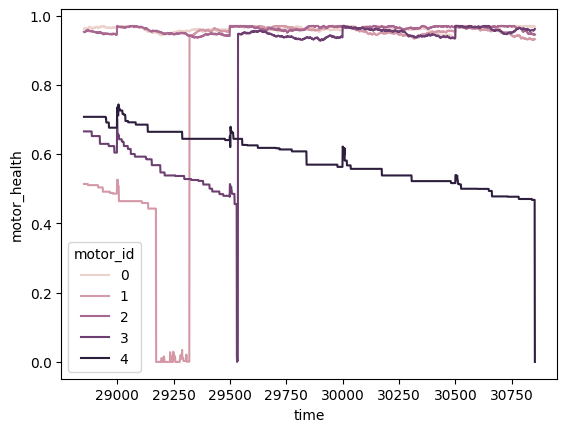

In [29]:
sns.lineplot(x=df["time"], y=df['motor_health'], hue=df['motor_id'], data=df.sample(5000))


In [31]:
df["RUL"] = df.groupby("motor_id")["time"].transform("max") - df["time"]


<Axes: xlabel='RUL', ylabel='Count'>

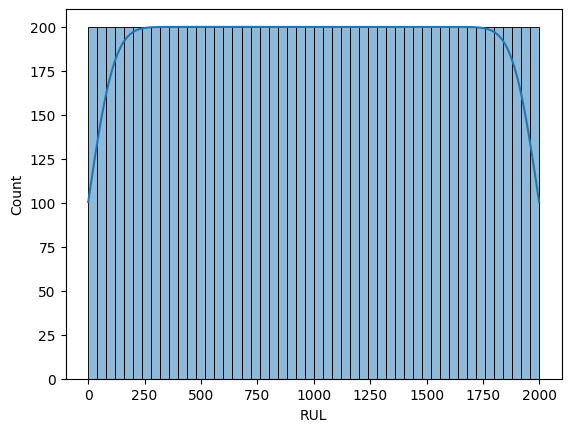

In [36]:
sns.histplot(data=df, x="RUL", bins=50, kde=True)

# EDA

In [37]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
os.makedirs("eda_results/stats", exist_ok=True)
os.makedirs("eda_results/plots", exist_ok=True)


In [38]:
missing = (
    df.isna()
      .mean()
      .rename("missing_fraction")
      .reset_index()
      .rename(columns={"index": "column"})
)

missing.to_csv("eda_results/stats/missingness.csv", index=False)
missing


,column,missing_fraction
0,temperature,0.0040
1,vibration,0.0069
2,current,0.0048
3,rpm,0.0061
4,motor_health,0.0000
5,health_state,0.0000
6,hours_since_maintenance,0.0000
7,degradation_stage,0.0000
8,time,0.0000
9,motor_id,0.0000


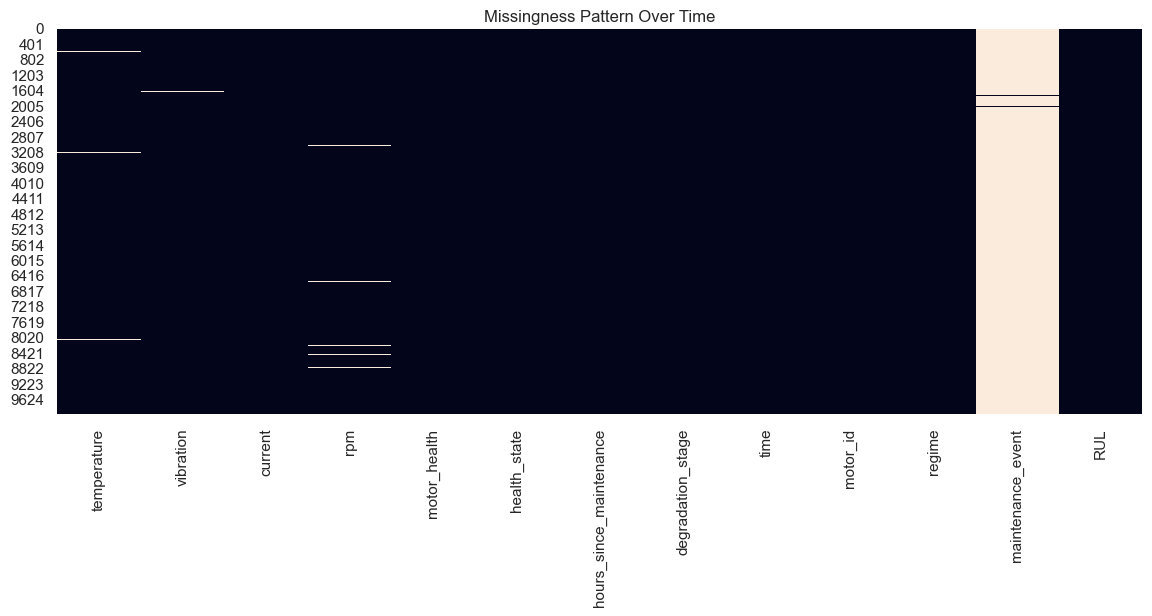

In [41]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Pattern Over Time")
plt.savefig("eda_results/plots/missingness.png", dpi=150)
plt.show()
plt.close()



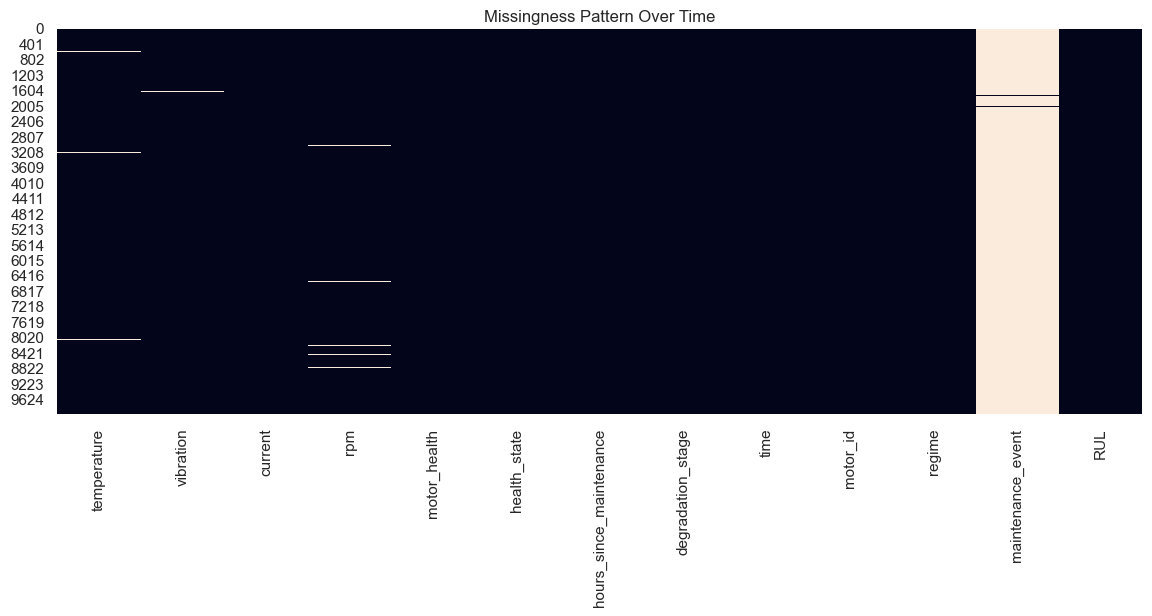

In [42]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Pattern Over Time")
plt.savefig("eda_results/plots/missingness.png", dpi=150)
plt.show()
plt.close()


In [43]:
per_motor = (
    df.groupby("motor_id")
      .agg(
          rows=("time", "count"),
          start_time=("time", "min"),
          end_time=("time", "max"),
          mean_health=("motor_health", "mean"),
          min_health=("motor_health", "min")
      )
      .reset_index()
)

per_motor.to_csv("eda_results/stats/per_motor_summary.csv", index=False)
per_motor.head()


,motor_id,rows,start_time,end_time,mean_health,min_health
0,0,2000,28853,30852,0.961752,0.932636
1,1,2000,28853,30852,0.809675,0.000000
2,2,2000,28853,30852,0.960573,0.936027
3,3,2000,28853,30852,0.817758,0.000000
4,4,2000,28853,30852,0.589511,0.000000


In [44]:
sensors = ["temperature","vibration","current","rpm"]

dist_stats = (
    df[sensors]
    .describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])
    .T
)

dist_stats.to_csv("eda_results/stats/sensor_distributions.csv")
dist_stats


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
temperature,9960.0,28.503533,0.494241,27.507850,27.819655,27.949243,28.179506,28.356793,28.633101,29.531005,29.999369,30.452944
vibration,9931.0,2.494522,0.739798,0.857631,1.989534,2.029628,2.098791,2.191333,2.754521,3.525689,6.998378,7.250235
current,9952.0,11.717174,6.832083,2.473655,2.681460,2.880103,5.358693,11.376434,17.110843,24.918110,29.048935,31.825361
rpm,9939.0,1795.862230,3.242444,1784.997074,1788.642809,1790.647170,1793.659302,1795.798594,1797.955829,1801.183337,1803.935231,1810.362785


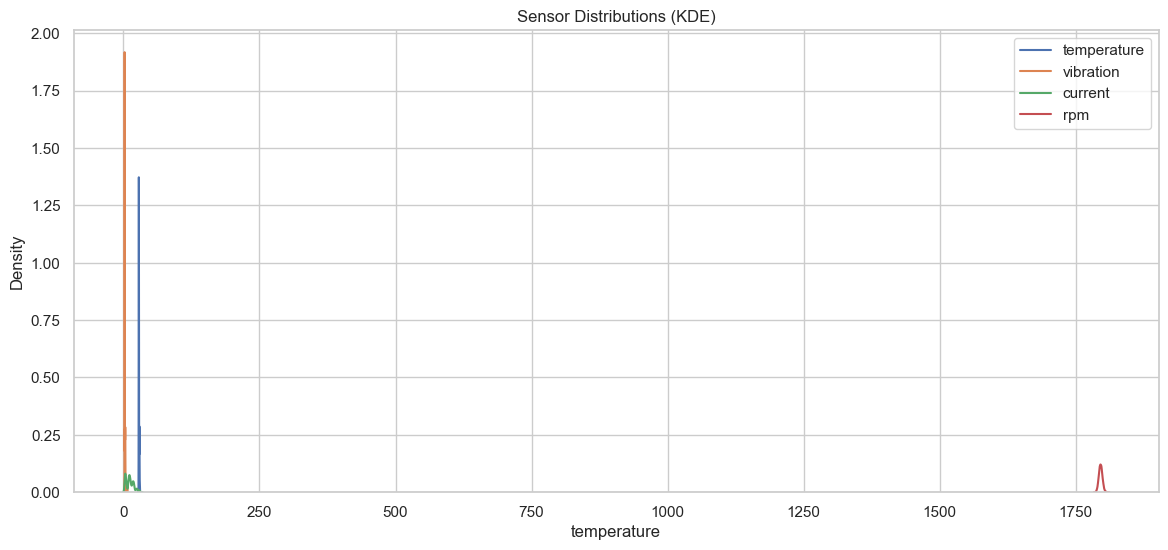

In [46]:
plt.figure(figsize=(14,6))
for s in sensors:
    sns.kdeplot(df[s].dropna(), label=s)
plt.legend()
plt.title("Sensor Distributions (KDE)")
plt.savefig("eda_results/plots/sensor_kde.png", dpi=150)
plt.show()
plt.close()


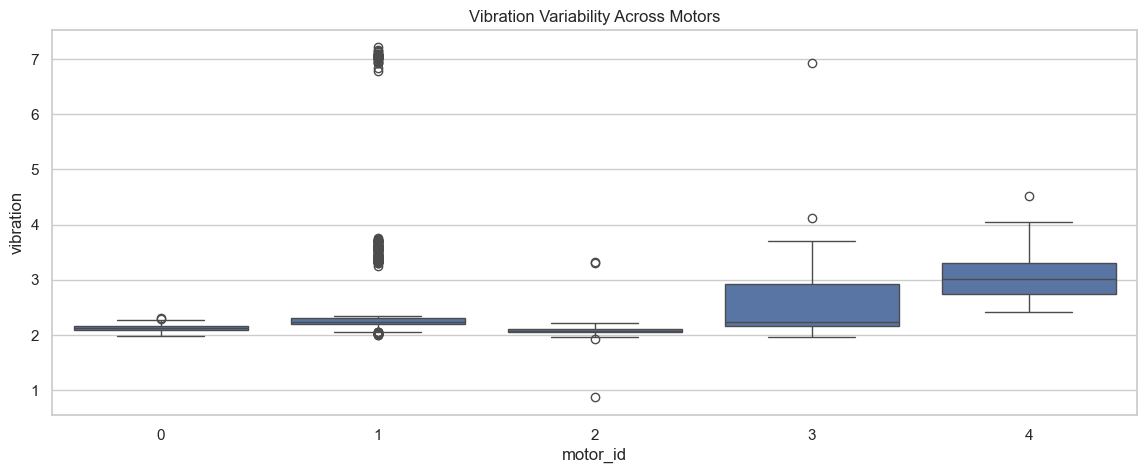

In [47]:
sample = df.sample(3000, random_state=42)

plt.figure(figsize=(14,5))
sns.boxplot(x="motor_id", y="vibration", data=sample)
plt.title("Vibration Variability Across Motors")
plt.savefig("eda_results/plots/motor_variability.png", dpi=150)
plt.show()
plt.close()


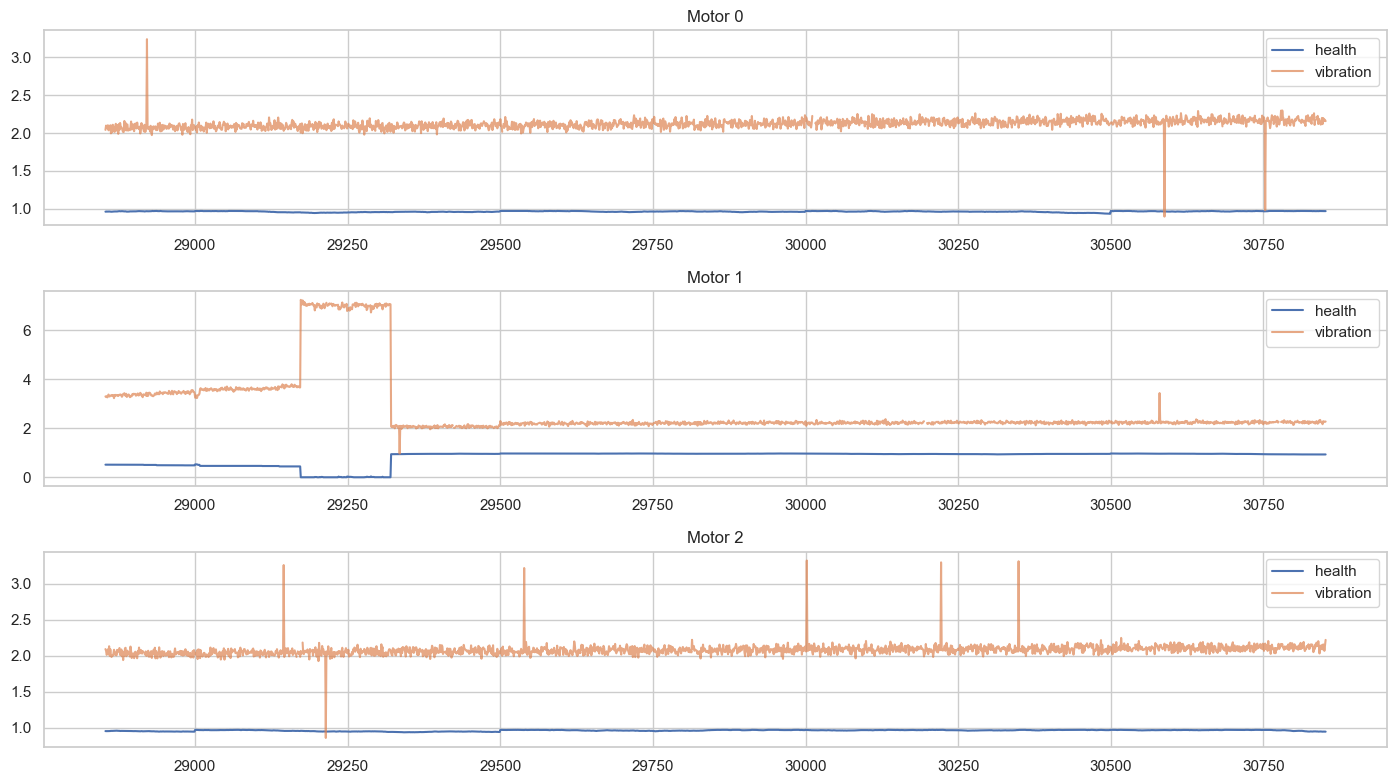

In [48]:
motors = df["motor_id"].unique()[:3]

plt.figure(figsize=(14,8))
for i, m in enumerate(motors, 1):
    plt.subplot(3,1,i)
    sub = df[df.motor_id == m]
    plt.plot(sub.time, sub.motor_health, label="health")
    plt.plot(sub.time, sub.vibration, label="vibration", alpha=0.7)
    plt.legend()
    plt.title(f"Motor {m}")
plt.tight_layout()
plt.savefig("eda_results/plots/time_series_examples.png", dpi=150)
plt.show()
plt.close()


In [49]:
corr = df[
    ["motor_health","temperature","vibration","current","rpm"]
].corr()

corr.to_csv("eda_results/stats/correlations.csv")


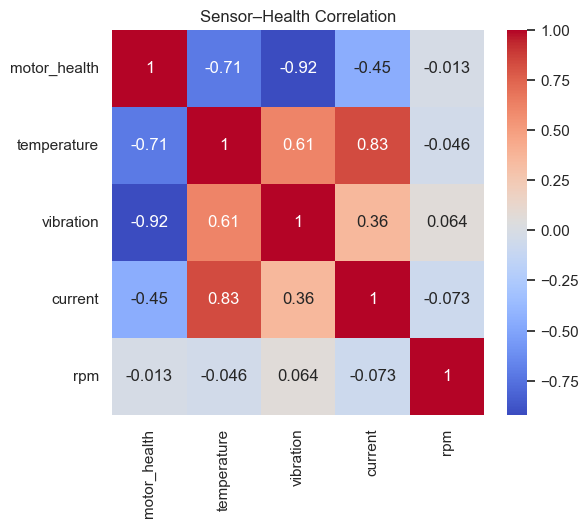

In [50]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Sensor–Health Correlation")
plt.savefig("eda_results/plots/correlation_heatmap.png", dpi=150)
plt.show()
plt.close()


In [51]:
lags = range(0, 30)
lag_results = []

for sensor in ["vibration","current","temperature"]:
    for lag in lags:
        corr = (
            df["motor_health"]
            .shift(lag)
            .corr(df[sensor])
        )
        lag_results.append({
            "sensor": sensor,
            "lag": lag,
            "correlation": corr
        })

lag_df = pd.DataFrame(lag_results)
lag_df.to_csv("eda_results/stats/lag_correlations.csv", index=False)


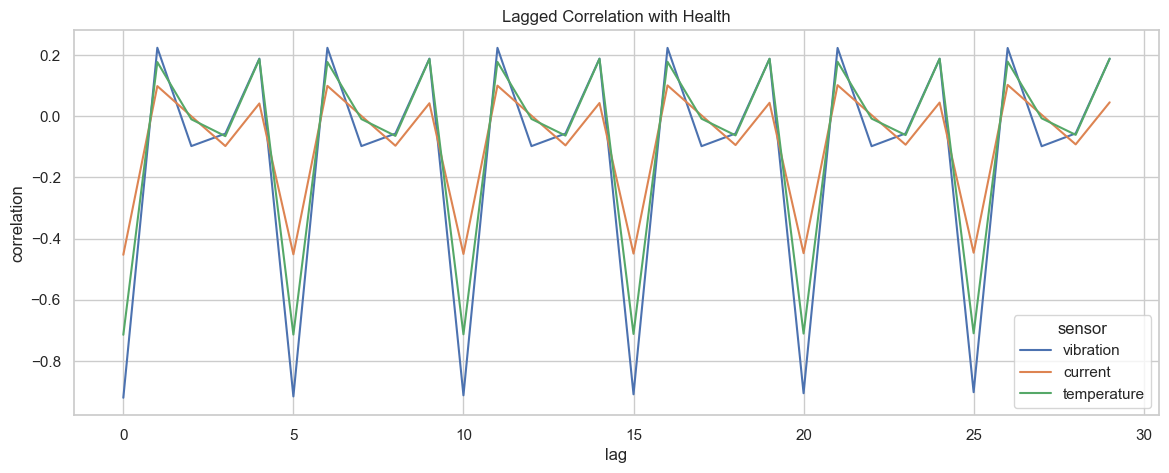

In [52]:
plt.figure(figsize=(14,5))
sns.lineplot(data=lag_df, x="lag", y="correlation", hue="sensor")
plt.title("Lagged Correlation with Health")
plt.savefig("eda_results/plots/lag_analysis.png", dpi=150)
plt.show()
plt.close()


In [53]:
regime_stats = (
    df.groupby("regime")[sensors]
      .agg(["mean","std"])
)

regime_stats.to_csv("eda_results/stats/regime_stats.csv")


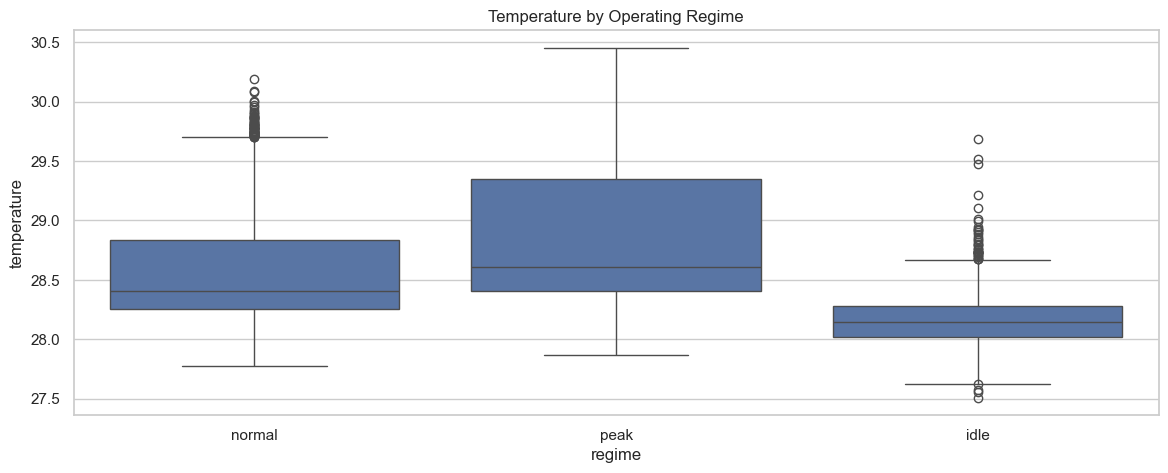

In [54]:
plt.figure(figsize=(14,5))
sns.boxplot(x="regime", y="temperature", data=df)
plt.title("Temperature by Operating Regime")
plt.savefig("eda_results/plots/regime_effects.png", dpi=150)
plt.show()
plt.close()


In [55]:
maint = df[df.maintenance_event.notna()]

maintenance_stats = {
    "count": len(maint),
    "mean_health_before": maint.motor_health.mean(),
    "min_health_before": maint.motor_health.min()
}

pd.DataFrame([maintenance_stats]).to_csv(
    "eda_results/stats/maintenance_stats.csv", index=False
)


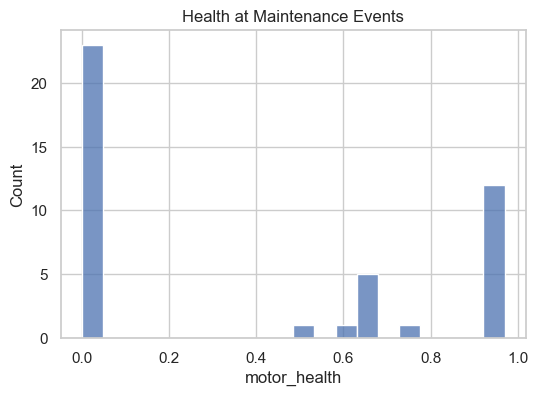

In [56]:
plt.figure(figsize=(6,4))
sns.histplot(maint.motor_health, bins=20)
plt.title("Health at Maintenance Events")
plt.savefig("eda_results/plots/maintenance_effect.png", dpi=150)
plt.show()
plt.close()
